# Business Understanding

The goal is to save the new home buyers some time and to help ensure consistency in pricing between new houses on the market and old houses.

The main purpose of this algorithm is predictive, meaning that this model should be able to take in attributes of the King's County dataset that does not yet have a set price, and to predict a good price. The effectiveness of this predictive model will be measured by how well it predicts prices in our test set, where we know what the actual prices were but the model does not.

The secondary purpose of this algorithm is inferential, meaning that the model should be able to tell us something about the relationship between the attributes of a house in King's County and its price. 

### Analysis Questions

This analysis will seek to answer three questions about the data:

**Question 1:** Which features are most highly correlated with price?

**Question 2:** Which features have the strongest correlations with other predictor variables?

**Question 3:** What combinations of features is the best fit, in terms of predictive power, for a multiple regression model to predict house prices?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore') # Ignores big red warning signs
 
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Handling Missing Values

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
print(df['waterfront'].isnull().count())
print(df['waterfront'].nunique())
print(df['waterfront'].unique())
print(df['waterfront'].value_counts())

21597
2
[nan 'NO' 'YES']
NO     19075
YES      146
Name: waterfront, dtype: int64


In [8]:
print(df['view'].nunique())
print(df['view'].unique())
print(df['view'].value_counts())

5
['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [9]:
print(df['yr_renovated'].nunique())
print(df['yr_renovated'].unique())

70
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [10]:
print(df['floors'].nunique())
print(df['floors'].unique())
print(df['floors'].value_counts())

6
[1.  2.  1.5 3.  2.5 3.5]
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64


In [11]:
df['yr_renovated'].fillna(0,inplace=True)

In [12]:
df['view'].fillna('NONE', inplace=True)

In [13]:
df['waterfront'].fillna('NO', inplace=True)

0.0 yr_renovated is not actually information that is missing from our dataset, it is a genuine category which means the house has never been renovated. This interpretation aligns with what we see in data/column_names.txt. So, let's replace those NaNs with the string "N/A" to indicate that this is a real category, not missing data:

In [14]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
df['date'] = pd.to_datetime(df['date'])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [16]:
df["date"].describe()

count                   21597
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

In [17]:
df.sqft_basement = df.sqft_basement.replace('?', '0.0')

In [18]:
df.sqft_basement = df.sqft_basement.astype('float')

In [19]:
df.floors = df.floors.astype('object')

In [20]:
df.sqft_basement = df.sqft_basement.astype(np.dtype('int64')) #converts column from float to int64, in line with the other similar columns

In [21]:
df.yr_renovated = df.yr_renovated.astype(np.dtype('int64'))

It's advisable to remove the `id` column as keeping it in won't lead to meaningful results.

In [22]:
df.drop(["id"],axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  object        
 7   waterfront     21597 non-null  object        
 8   view           21597 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [24]:
categorical_cols = list(df.select_dtypes('object').columns)
categorical_cols

['floors', 'waterfront', 'view', 'condition', 'grade']

In [25]:
df[categorical_cols].nunique()

floors         6
waterfront     2
view           5
condition      5
grade         11
dtype: int64

In [26]:
cont_cols = list(df.select_dtypes('number').columns)
cont_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [27]:
df[cont_cols].nunique()

price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
sqft_above        942
sqft_basement     303
yr_built          116
yr_renovated       70
zipcode            70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
dtype: int64

In [28]:
df.select_dtypes('number')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [29]:
df.select_dtypes('object')

,floors,waterfront,view,condition,grade
0,1,NO,NONE,Average,7 Average
1,2,NO,NONE,Average,7 Average
2,1,NO,NONE,Average,6 Low Average
3,1,NO,NONE,Very Good,7 Average
4,1,NO,NONE,Average,8 Good
...,...,...,...,...,...
21592,3,NO,NONE,Average,8 Good
21593,2,NO,NONE,Average,8 Good
21594,2,NO,NONE,Average,7 Average
21595,2,NO,NONE,Average,8 Good


### Identifying Categorical Variables

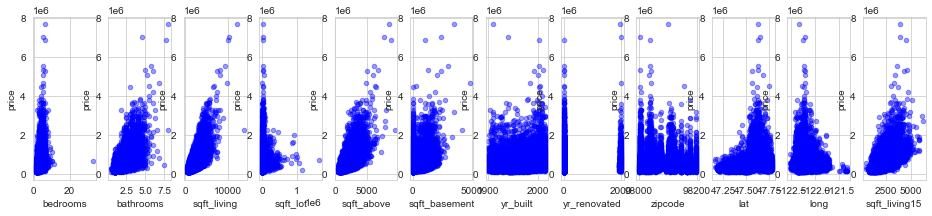

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(16,3))

for xcol, ax in zip(cont_cols[1:14], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

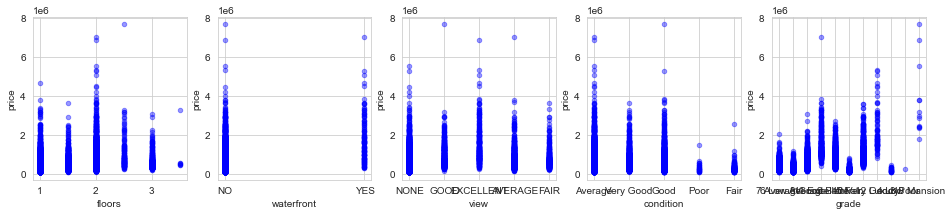

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(categorical_cols, axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

## Interpret a Correlation Heatmap to Build a Baseline Model

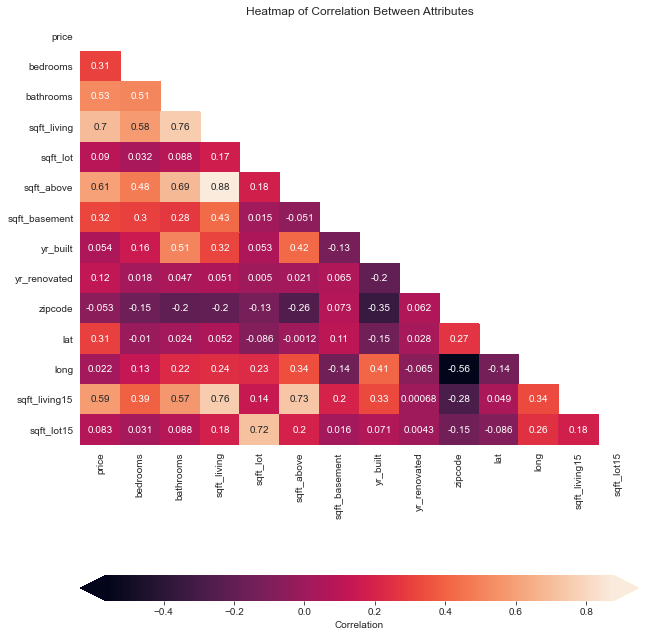

In [32]:
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes");

According to the heatmap above, `sqft_above` is the most strongly correlated with `price`.

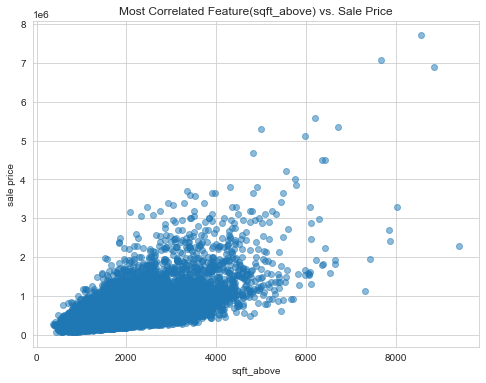

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(df["sqft_above"], df["price"], alpha=0.5)
ax.set_xlabel("sqft_above")
ax.set_ylabel("sale price")
ax.set_title("Most Correlated Feature(sqft_above) vs. Sale Price");

### Identifying Multicollinearity

To understand the correlation structure of the predictors, we'll take a copy of the data but this time without the target variable (`price`) in it.

In [34]:
df_pred = df.drop(["price"], axis=1)

In [35]:
df_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
sqft_above,0.479386,0.686668,0.876448,0.184139,1.000000,-0.051175,0.424037,0.020645,-0.261570,-0.001199,0.344842,0.731767,0.195077
sqft_basement,0.297229,0.278485,0.428660,0.015031,-0.051175,1.000000,-0.130085,0.065008,0.073271,0.109853,-0.142369,0.199288,0.015885
yr_built,0.155670,0.507173,0.318152,0.052946,0.424037,-0.130085,1.000000,-0.202555,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.017900,0.047177,0.051060,0.004979,0.020645,0.065008,-0.202555,1.000000,0.062397,0.027970,-0.064543,0.000683,0.004286
zipcode,-0.154092,-0.204786,-0.199802,-0.129586,-0.261570,0.073271,-0.347210,0.062397,1.000000,0.266742,-0.564259,-0.279299,-0.147294
lat,-0.009951,0.024280,0.052155,-0.085514,-0.001199,0.109853,-0.148370,0.027970,0.266742,1.000000,-0.135371,0.048679,-0.086139


In [36]:
abs(df_pred.corr()) > 0.7

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,True
sqft_above,False,False,True,False,True,False,False,False,False,False,False,True,False
sqft_basement,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,True,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,True,False,False,False,False
lat,False,False,False,False,False,False,False,False,False,True,False,False,False


It seems like are `sqft_above`, `sqft_living`, `sqft_living15`, `sqft_lot`, `sqft_lot15` and `bathroom` are  highly correlated among each other.

In [37]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

data=df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
data['pairs'] = list(zip(data.level_0, data.level_1))

# set index to pairs
data.set_index(['pairs'], inplace = True)

#d rop level columns
data.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
data.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
data.drop_duplicates(inplace=True)

In [38]:
data[(data.cc>.75) & (data.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living15, sqft_living)",0.756402
"(bathrooms, sqft_living)",0.755758


With the variables `sqft_above`, `sqft_living`, `sqft_living15` and `bathrooms` so highly correlated, you would typically remove three of them in order to remove collinear features.